In [31]:
# Graphing functions
def graph_all(x, y_approx, y_exact):
    """Inputs our array of inputs x, our approximated array of outputs y,
    and our known exact y to make a graph."""
    import matplotlib.pyplot as plt
    
    # Plot our values
    plt.plot(x, y_approx, color="black", linestyle="dotted")
    plt.plot(x, y_exact, color="black")
    
    # Make cosmetic expectations and display graph
    plt.grid()
    plt.xlabel("X-Axis")
    plt.ylabel("Y-Axis")
    plt.show()

    
    
    
# Matrix generation functions
def M_matrix(h, k, dimension):
    """Used to generate a matrix M that solves M*y(x)=I.
    
    We want each row to contain 1,-2-h^2k, 1 with the right 1's on our diagonal"""
    import numpy as np
    
    # Generate the 0 matrix as our starting point, make it 2 rows/columns shorter, and make its diagonal 1
    matrix = np.zeros((dimension-2,dimension-2))
    np.fill_diagonal(matrix, int(1))
    
    
    
    
    # Add a row of 0's to the top and column of 0's to the right
    row = np.zeros((dimension-2,1), dtype = "int8")
    matrix = np.hstack((matrix, row))

    column = np.zeros((1,dimension-1), dtype = "int8")
    matrix = np.vstack((column, matrix))
    
    # Replace the new diagonals with -2-h^2k
    np.fill_diagonal(matrix,-2 - (h ** 2) * k)
    
                     
                     
                     
    # Add a row of 0's to the top and column of 0's to the right
    row = np.zeros((dimension-1,1), dtype = "int8")
    matrix = np.hstack((matrix, row))

    column = np.zeros((1,dimension), dtype = "int8")
    matrix = np.vstack((column, matrix))
    
    # Replace the new diagonals with 1
    np.fill_diagonal(matrix, int(1))
    
    
    return matrix

def I_matrix(h, y_initial, yp_initial, height):
    """Used to generate a vector I of a specific height that solves M*y(x)=I.
    We want the first row to be y(0)+hy'(0), second to be -y(0), and everything else to be 0."""
    import numpy as np
    
    # Generate a 0 vector that's 2 units shorter than its intended height
    vector = np.zeros((height-2,1))
    
    # Append -y(0) to the front of it
    vector = np.append( np.array([ [-y_initial] ]) , vector )
    
    # Append y(0)+hky'(0) to the front of it
    vector = np.append( np.array([ [y_initial + h * yp_initial] ]) , vector )
    
    
    
    
    return vector

In [40]:
def yppx_to_kyx(constant, y_initial, yp_initial, x_max, interv_num):
    """With the assumption that the minimum x is x=0 and our initial value is at x=0,
    we input an initial value, an initial y' value, a maximum input value, and the number of intervals to
    solve the differential equation y''(x) = k * y(x) with our constant being k.
    
    The EXACT solution to this DE is:
    y(x) = ((y(0)sqrt(k) - y'(0)+((y(0)sqrt(k) + y'(0))e^(2sqrt(k)x))e^(-2sqrt(k)x)) / (2 * sqrt(k))."""
    import numpy as np
    from scipy.linalg import lu_factor
    from scipy.linalg import lu_solve
    from time import time
    
    begin = round(time(),2)
    
    # Make our array of x-inputs and our interval width constant
    x_min = 0
    x_val = np.linspace(x_min, x_max, interv_num+1)
    interv_width = (x_max - x_min) / interv_num
    
    
    
    
    # Make our M matrix and I array to assemble the equation M * y(x) = I
    m_matrix = M_matrix(interv_width, constant, interv_num)
    i_matrix = I_matrix(interv_width, y_initial, yp_initial, interv_num)
    

    
    
    # We know have My(x) = I, and it's better to do the LU decomposition to get y(x) than find the inverse
    lu, piv = lu_factor(m_matrix)
    y_val = lu_solve((lu, piv), i_matrix)
    
    #Append our initial y-value since y_val is everything except the first value
    y_val = np.append( np.array([y_initial]) , y_val )
    
    
    
    
    # Make our array of exact y-values and make a graph with our approximated and exact values
    y_exact = ( (y_initial * np.sqrt(constant) - yp_initial + (y_initial * np.sqrt(constant) + yp_initial) * np.exp(2 * np.sqrt(constant) * x_val)) * np.exp(-np.sqrt(constant) * x_val) ) / (2 * np.sqrt(constant))
    graph_all(x_val, y_val, y_exact)

    
    
    
    # Display useful info/stats
    print(f"Generated with {interv_num} subintervals.")
    print(f"Biggest margin of error is {round(abs(y_val[-1]-y_exact[-1]),5)} units.")
    end = round(time(),2)
    print(f"Finished in {round(end-begin,2)} seconds.")

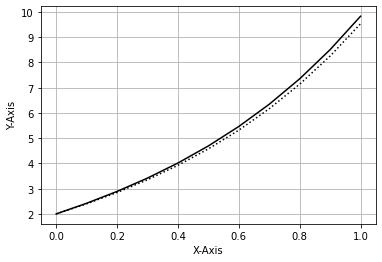

Generated with 10 subintervals.
Biggest margin of error is 0.29802 units.
Finished in 0.11 seconds.


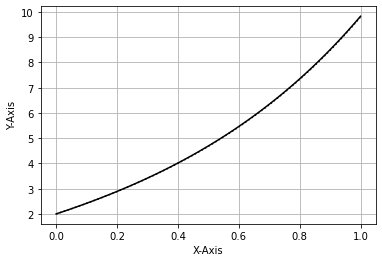

Generated with 100 subintervals.
Biggest margin of error is 0.02762 units.
Finished in 0.09 seconds.


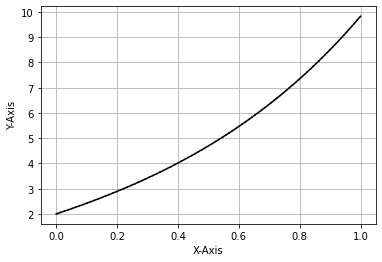

Generated with 1000 subintervals.
Biggest margin of error is 0.00274 units.
Finished in 0.13 seconds.


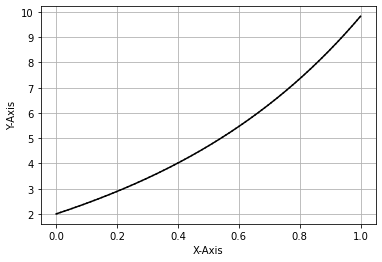

Generated with 10000 subintervals.
Biggest margin of error is 0.00027 units.
Finished in 7.79 seconds.


In [41]:
# Find the solution to y'(x)=2y(x), y(0)=2, y'(0)=4, 0<x<1
# Format is yppx_to_kyx(constant, y_initial, yp_initial, x_max, interv_num)
for i in range (4):
    yppx_to_kyx(2, 2, 4, 1, 10 ** (i+1))